## Activation functions

#### 1) Sigmoid Function

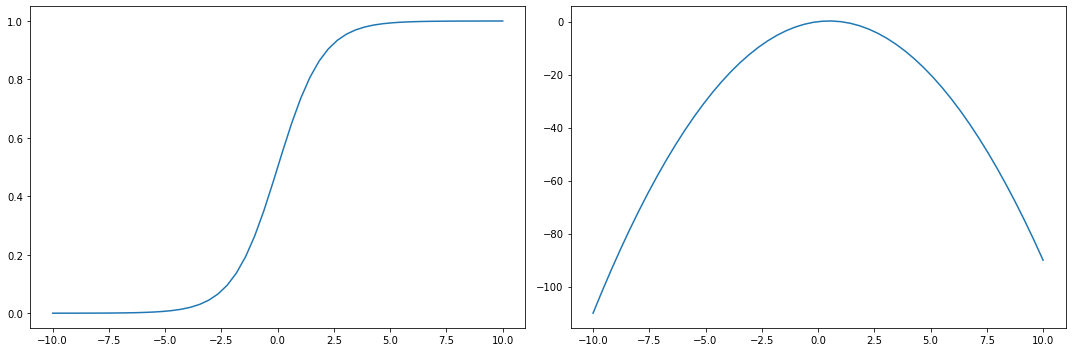

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt


sigmoid = (
  lambda x:1 / (1 + np.exp(-x)),
  lambda x:x * (1 - x)
  )

rango = np.linspace(-10,10).reshape([50,1])
datos_sigmoide = sigmoid[0](rango)
datos_sigmoide_derivada = sigmoid[1](rango)

#We create the plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(15,5))
axes[0].plot(rango, datos_sigmoide)
axes[1].plot(rango, datos_sigmoide_derivada)
fig.tight_layout()

#### 2) Relu activation function

Equation :- A(x) = max(0,x). It gives an output x if x is positive and 0 otherwise.

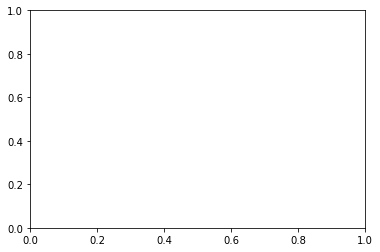

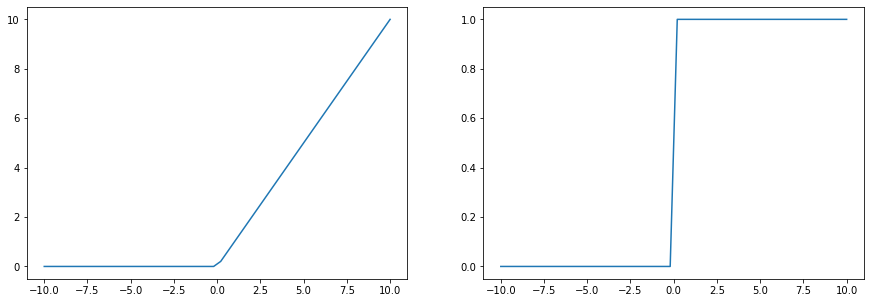

In [6]:
def derivada_relu(x):
  x[x<=0] = 0
  x[x>0] = 1
  return x

relu = (
  lambda x: x * (x > 0),
  lambda x:derivada_relu(x)
  )

datos_relu = relu[0](rango)
datos_relu_derivada = relu[1](rango)


# We set the range
rango = np.linspace(-10,10).reshape([50,1])

# We create the graphs
plt.cla()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(15,5))
axes[0].plot(rango, datos_relu[:,0])
axes[1].plot(rango, datos_relu_derivada[:,0])
plt.show()

#### 3)tanh or Hyperbolic

Tanh will map values to be between -1 and 1.

<ipython-input-7-fe76affe1f1e>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


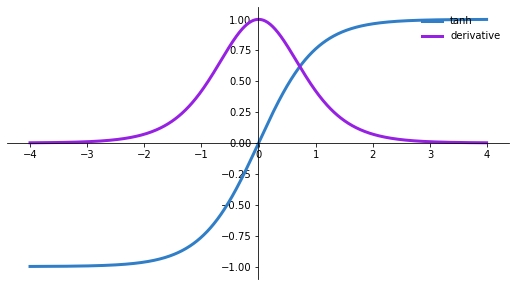

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def tanh(x):
    t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    dt=1-t**2
    return t,dt
z=np.arange(-4,4,0.01)
tanh(z)[0].size,tanh(z)[1].size
# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
ax.plot(z,tanh(z)[0], color="#307EC7", linewidth=3, label="tanh")
ax.plot(z,tanh(z)[1], color="#9621E2", linewidth=3, label="derivative")
ax.legend(loc="upper right", frameon=False)
fig.show()

#### 4) Leaky ReLu 

Leaky ReLU function is an improved version of the ReLU function.
It replacing the negative values with constant(=0.01) times the value instead of 0.

Condition
0.01 , if  X < 0
  and X  otherwise

In [10]:
import numpy as np
def leaky_relu_function(x):
    if x<0:
        return 0.01*x
    else:
        return x
    
leaky_relu_function(7), leaky_relu_function(-7)

(7, -0.07)

#### 5) Exponential Linear Unit 

Exponential Linear Unit is a variant of(ReLU) that modifies the slope of the negative part of the function.
ELU uses a log curve for defning the negatice values.

condition f(x) = x, if  x>=0
     and f(x )= a(e^x-1), if x<0

In [11]:
def elu_function(x, a):
    if x<0:
        return a*(np.exp(x)-1)
    else:
        return x
    
elu_function(5, 0.1),elu_function(-5, 0.1)

(5, -0.09932620530009145)

## IMAGE FILTERING

In [17]:
pip install cv2-tools


  Created wheel for python-constraint: filename=python_constraint-1.4.0-py2.py3-none-any.whl size=24086 sha256=0396cf30c51a30f09ab4a2d4c51fb4867c6ed062d237b3cef93ec978832c27d5
  Stored in directory: c:\users\reshm\appdata\local\pip\cache\wheels\86\ba\5c\4e9115777de42c6a2e1ca77ef7c9d0d479254c5080341b55c5
Successfully built python-constraint


### 3x3 shaped filter

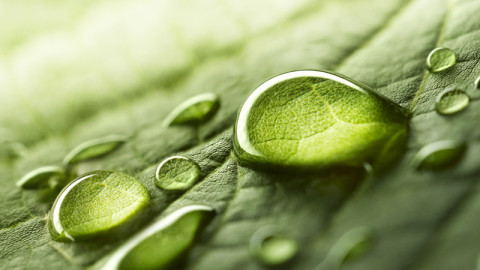

In [26]:
import numpy as np
import cv2

#read image
img_src = cv2.imread('sample.jpg')

#display image
from IPython import display 
display.Image("sample.jpg")

In [49]:
#prepare the 3x3 shaped filter
kernel = np.array([[1, 1, 1], 
                   [1, 1, 1], 
                   [1, 1, 1]])
kernel = kernel/sum(kernel)

#filter the source image
img_rst = cv2.filter2D(img_src,-1,kernel)

#save result image
cv2.imwrite('result1.jpg',img_rst)

True

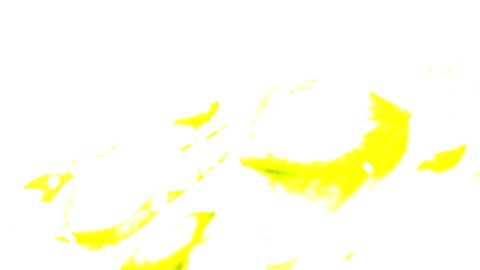

In [50]:
#output image
display.Image("result1.jpg")

#### Entropy (3x3)

Entropy: 1.1857806772605624


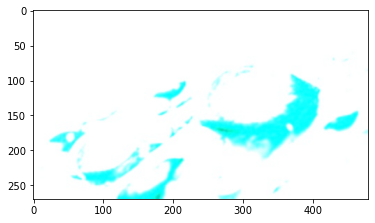

In [51]:
img_src = cv2.imread('result1.jpg')
plt.imshow(img_src)
entropy = skimage.measure.shannon_entropy(img_src)
print("Entropy:",entropy)

### 5x5 shaped filter

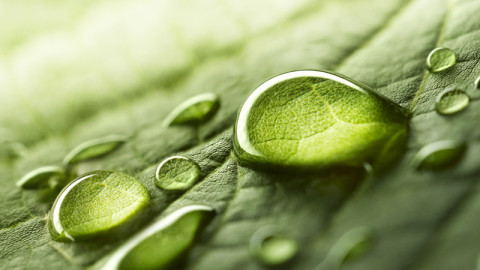

In [54]:
import numpy as np
import cv2

#read image
img_src = cv2.imread('sample2.jpg')

#display image
from IPython import display 
display.Image("sample2.jpg")

In [55]:
#prepare the 5x5 shaped filter
kernel = np.array([[1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1]])
kernel = kernel/sum(kernel)

#filter the source image
img_rst = cv2.filter2D(img_src,-1,kernel)

#save result image
cv2.imwrite('result2.jpg',img_rst)

True

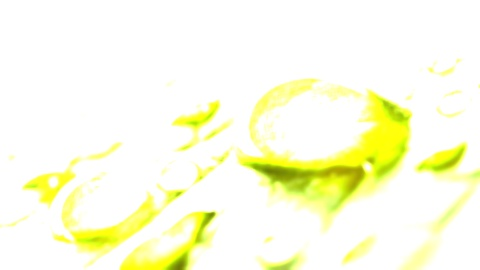

In [56]:
#output image
display.Image("result2.jpg")

#### Entropy (5x5)

Entropy: 3.682130972172881


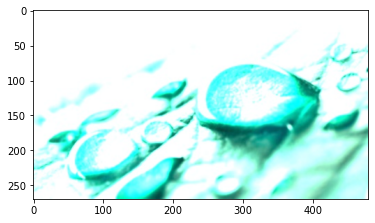

In [57]:
img_src = cv2.imread('result.jpg')
plt.imshow(img_src)
entropy = skimage.measure.shannon_entropy(img_src)
print("Entropy:",entropy)

## 3x3 & 5x5 filters with Stride and Padding

In [31]:
pip install keras

In [35]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [36]:
pip install tensorflow


  Using cached tensorflow-2.4.1-cp38-cp38-win_amd64.whl (370.7 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached wrapt-1.12.1.tar.gz (27 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached oauthlib-3.1.0-py2.py3-none-any.whl (147 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=e9d94aca03133fa3765eede378099154d5a5f6f9dd476849898bf28a718e5fa5
  Stored in directory: c:\users\reshm\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=b556e29202e3a09bfb5d81773ccde793ab8631a2a8fff909c7f1efce3a754312
  Stored in directory: c:\users\reshm\appd

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Conv2D
import skimage.measure 

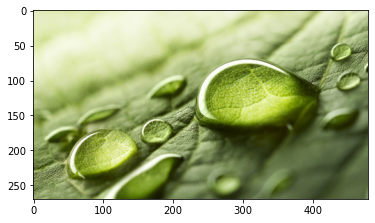

In [39]:
#Importing the image

from PIL import Image
image = Image.open('sample.jpg')
plt.imshow(image)

In [40]:
# 25,25,3 rows,columns,scale(here 3: red green blue, 1: gray scale)

rsize = image.resize((np.array((15,15))).astype(int))
image = np.asarray(rsize)
image.shape

(15, 15, 3)

In [41]:
#Puting the image into an array
x=image.reshape(1,15,15,3)

In [42]:
def Convolution(x,kernel_size,strides=1, padding='valid'):
 model=Sequential()
 model.add(Conv2D(1, kernel_size=kernel_size,strides=strides,padding=padding,input_shape=(15,15,3)))
 yhat = model.predict(x)
 y=yhat.reshape(yhat.shape[1],yhat.shape[2])
 filtered_image = Image.fromarray(y)
 return filtered_image

In [59]:
#filter size (3*3), stride=2

Filtered_image1 = Convolution(x,(3,3),2)

#filter size (5*5), stride=2

Filtered_image2 = Convolution(x,(5,5),2)

#filter size (3*3),stride=1, zero-padding

Filtered_image3 = Convolution(x,(3,3),1,'same')

#filter size (5*5),stride=1, zero-padding

Filtered_image4 = Convolution(x,(5,5),1,'same')


### Entropy

Entropy: 5.614709844115208


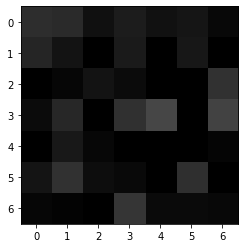

In [60]:
#filter size (3*3), stride=2
plt.imshow(Filtered_image1)
entropy = skimage.measure.shannon_entropy(Filtered_image_21)
print("Entropy:",entropy)


Entropy: 5.169925001442313


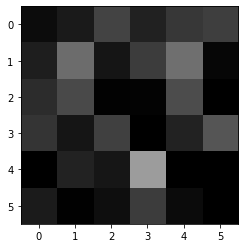

In [61]:
#filter size (5*5), stride=2
plt.imshow(Filtered_image2)
entropy = skimage.measure.shannon_entropy(Filtered_image_22)
print("Entropy:",entropy)


Entropy: 7.81378119121704


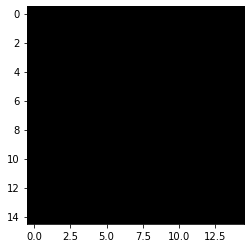

In [62]:
#filter size (3*3),stride=1, zero-padding
plt.imshow(Filtered_image3)
entropy = skimage.measure.shannon_entropy(Filtered_image_31)
print("Entropy:",entropy)

Entropy: 7.81378119121704


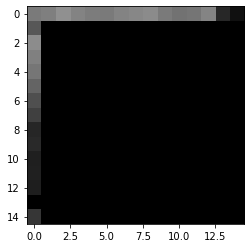

In [63]:
#filter size (5*5),stride=1, zero-padding
plt.imshow(Filtered_image4)
entropy = skimage.measure.shannon_entropy(Filtered_image_32)
print("Entropy:",entropy)